<a href="https://colab.research.google.com/github/yongkgu/Computer_Vision/blob/main/LANSAC%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%B0%A8%EC%84%A0_%EA%B2%80%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


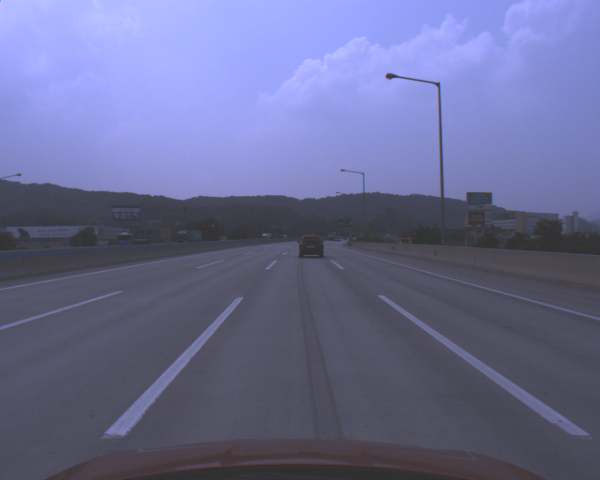

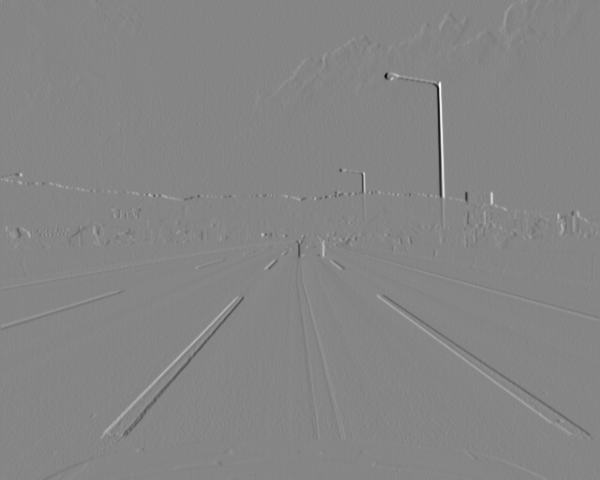

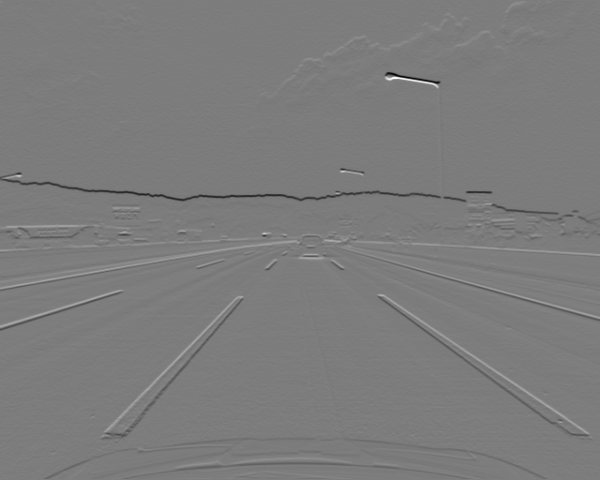

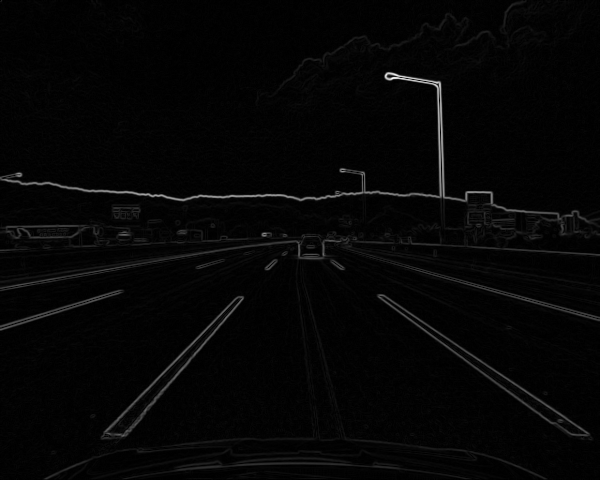

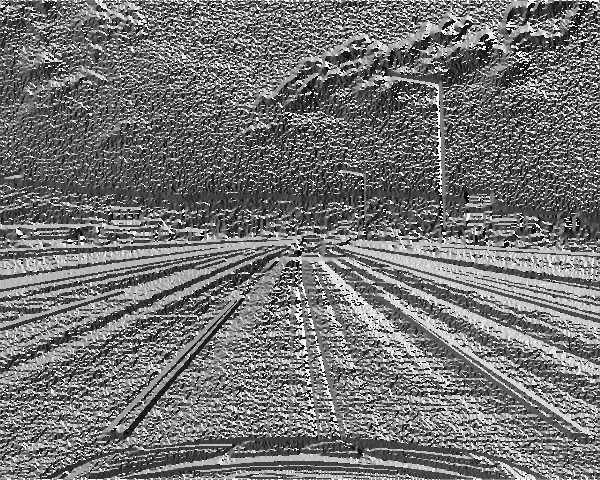

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv_imshow

img_ = cv.imread('gdrive/MyDrive/MachineVision/lanes.bmp')
img = cv.imread('gdrive/MyDrive/MachineVision/lanes.bmp',cv.IMREAD_GRAYSCALE) #그레이 스케일로 불러오기

Ix = cv.Sobel(img,ddepth=cv.CV_64F,dx=1,dy=0,ksize=3) #SOBEL필터를 사용하여 미분하여 저장 (X축)
Iy = cv.Sobel(img,ddepth=cv.CV_64F,dx=0,dy=1,ksize=3)
mag = np.sqrt(np.square(Ix) + np.square(Iy)) # 크기 구하기
ori = np.arctan2(Iy,Ix) * 180/np.pi # -180~+180 degrees #미분의 방향 구하기

# For display only
Ix_ = (Ix-Ix.min()) / (Ix.max()-Ix.min()) * 255 #그레이 스케일로 출력하기 위해  가장 작은값은 0 가장 큰 값은 255로 바꾸어준다.
Iy_ = (Iy-Iy.min()) / (Iy.max()-Iy.min()) * 255
mag_ = (mag-mag.min()) / (mag.max()-mag.min()) * 255
ori_ = (ori-ori.min()) / (ori.max()-ori.min()) * 255

cv_imshow(img_)
cv_imshow(Ix_)  #x방향 미분
cv_imshow(Iy_) #y방향 미분
cv_imshow(mag_) # mag
cv_imshow(ori_) # orientation

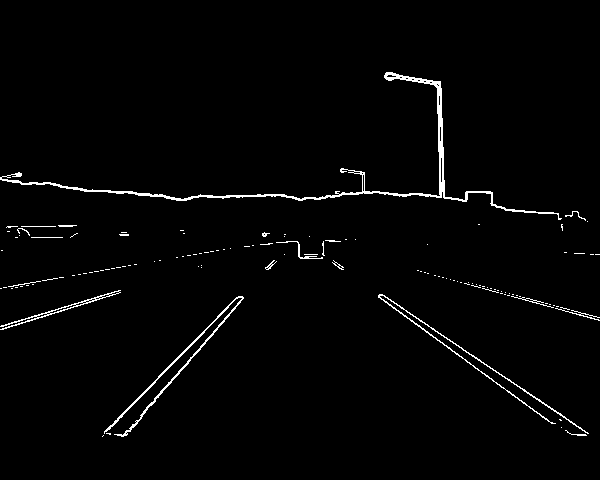

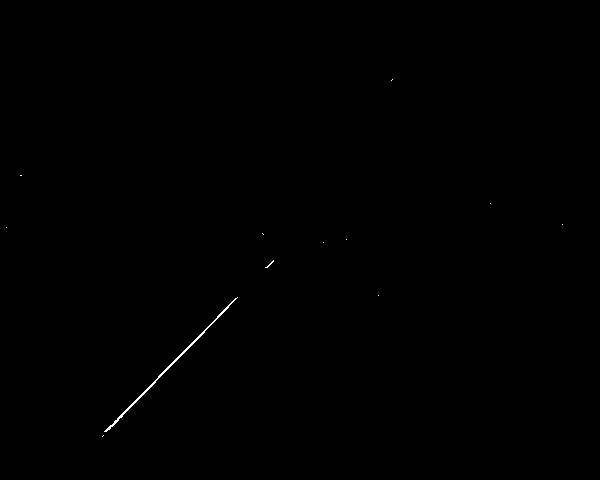

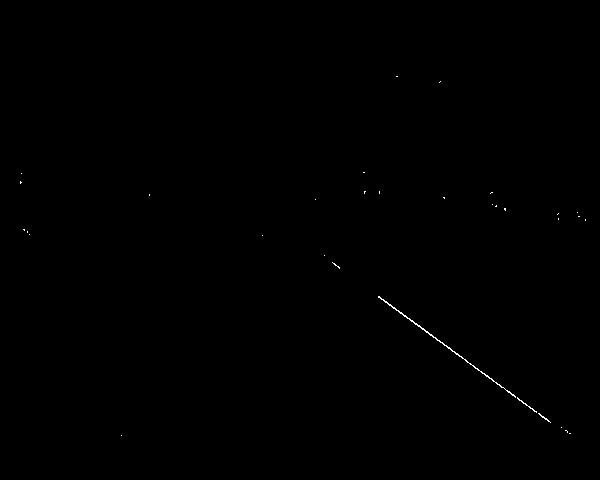

In [ ]:
result1 = np.zeros(img.shape)   #밝기 0으로 채워진 원본 이미지와 같은 크기의 카피 영상
id = np.where(mag>100) #크기가 100이상인 위치
result1[id] = 255 # 그 위치에 255의 밝기를 넣어줌

result2 = np.zeros(img.shape)
id_left = np.where((mag>100) & (ori>30) & (ori<60)) # 크기 70이상이면서 오리엔테이션이 60과 30 사이의 값
result2[id_left] = 255

result3 = np.zeros(img.shape)
id_right = np.where((mag>100) & (ori>-60) & (ori<-30))
result3[id_right] = 255

cv_imshow(result1)
cv_imshow(result2)
cv_imshow(result3)

(378,)
(411,)


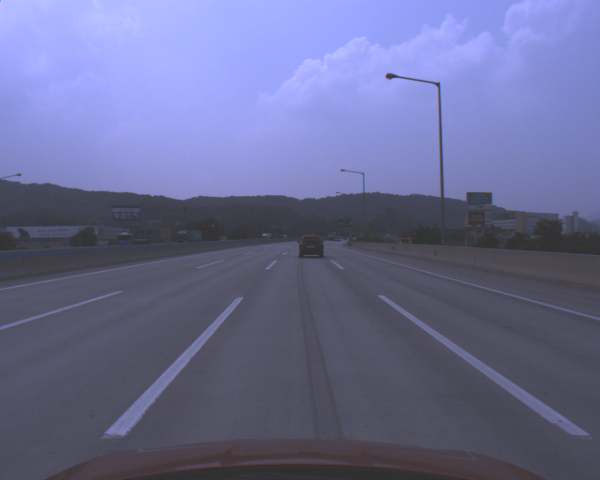

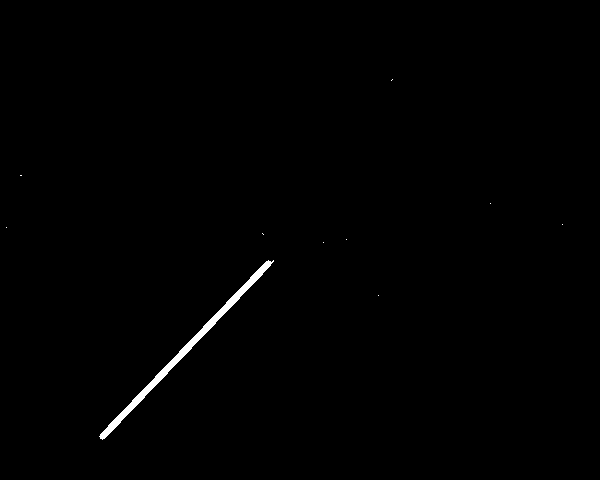

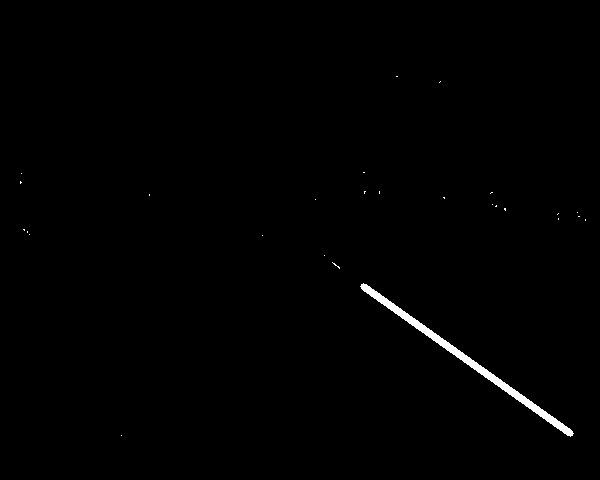

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x,a,b):
  return a*x+b
def ransac_line_fiting(x,y,r,t):
  iter = np.round(np.log(1-0.999) / np.log(1-(1-r)**2) + 1)
  num_max = 0
  for i in np.arange(iter):
    id = np.random.permutation(len(x))
    xs = x[id[:2]]
    ys = y[id[:2]]
    A = np.vstack([xs, np.ones(len(xs))]).T
    ab = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, ys))
    dist = np.abs(ab[0]*x-y+ab[1])/np.sqrt(ab[0]**2+1)
    numInliers = sum(dist < t)
    if numInliers > num_max:
      ab_max = ab
      num_max = numInliers
    return ab_max, num_max
    

xr = id_right[1]
yr = id_right[0]

xl = id_left[1]
yl = id_left[0]

abno, max = ransac_line_fiting(xr,yr,0.5,2)
y1= f(xr,abno[0],abno[1])
print(xr.shape)

abno2, max2 = ransac_line_fiting(xl,yl,0.5,2)
y2= f(xl,abno2[0],abno2[1])
print(xl.shape)

cv_imshow(img_)

img2 = cv.line(result2,(xl[20],int(y2[20])),(xl[410],int(y2[410])),(255,0,0), 5)
cv_imshow(img2)

img1 = cv.line(result3,(xr[4],int(y1[4])),(xr[376],int(y1[376])),(255,0,0), 5)
cv_imshow(img1)





#plt.plot(xno, f(xno,abno[0],abno[1]), '-b')

